In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)  # Remove null value

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [11]:
train_data.dtypes  # object and string is simliar int 64 int 32 int 16 = int16 is 16 bit signed integer

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# Extract derived attributes and data processing


In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
# date to journey preprocessing is doing because you convert datatype string data into number date month and year

In [17]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
# string to number convert all time covert in number 

In [19]:
# convert in datatime64[ns] datatype 64 bits

In [20]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [21]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])
  

In [22]:
# for ignoring warning
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
# function for convert object into datetime 
for feature in [ 'Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [25]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [26]:
data['Date_of_Journey'].dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [27]:
data['Date_of_Journey'].dt.month

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10682, dtype: int32

In [28]:
data['Date_of_Journey'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int32

In [29]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [30]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [31]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [32]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-10 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-10 05:50:00,2024-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-10 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [33]:
# performing data cleaning and extracting derived attribute

In [34]:
# Dep_time and Arrival_time take this for data cleaning and model building here extract time dep_time hr min and sec

In [35]:
# make a function for divide departure timea and arrival time

In [36]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df["Dep_Time"].dt.hour
    df[col + "_min"] = df["Dep_Time"].dt.minute

In [37]:
extract_hour_min(data, "Dep_Time")

In [38]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-10 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-10 05:50:00,2024-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [39]:
extract_hour_min(data, "Arrival_Time") # it is for arrivaltime separate


In [40]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-10 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-10 05:50:00,2024-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-10 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,9,25


In [41]:
# noe drop arrivaltime and dep_time beacaue now it useless

In [42]:
data.drop("Arrival_Time", axis=1, inplace=True)

In [43]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-10 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-10 05:50:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,5,50


In [44]:
# or we can drop by using array as well
col_to_drop = ["Dep_Time"] # here give by using quamma and give the fearure that you want to drop
data.drop(col_to_drop, inplace = True, axis = 1)


In [45]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,5,50


In [46]:
data.shape

(10682, 16)

In [47]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min'],
      dtype='object')

In [48]:
# fight in morning evening and night make by using Dep_Time

In [49]:
#fun -> morning, night, evening
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "noon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "night"
    else:
        return "late night"

In [50]:
data['Dep_Time_hour'].apply(flight_dep_time) # now the hr is show in morning and like that

0                night
1        Early Morning
2              Morning
3              Evening
4                 noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [51]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
noon             1731
night            1040
late night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

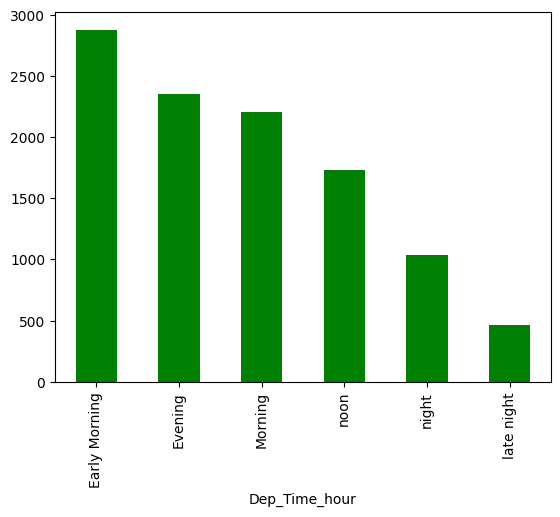

In [52]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='g')

In [53]:
# i want the bar is interactive the dynamic cart so use plotly
# so install plotly now
!pip install plotly
!pip install chart_studio


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [54]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

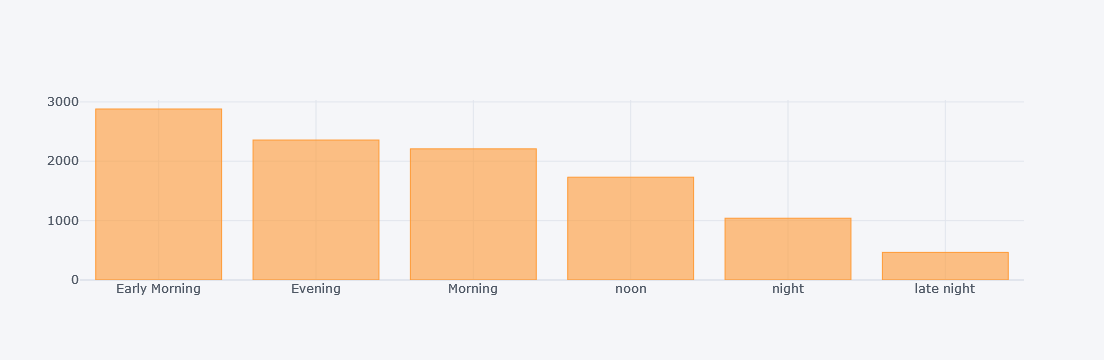

In [56]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [57]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,9,25


In [58]:
# Duration coloum convert into number and vector
data["Duration"]


0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [59]:
data["Duration"][0]

'2h 50m'

In [60]:
def preprocess_duration(x):  # 50m == 0h 50m        2h = 2h 0m
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x
        

In [61]:
# For removeing h missing and m mission
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [62]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [63]:
data["Duration"][0].split(' ')[0]

'2h'

In [64]:
data["Duration"][0].split(' ')[0][0:-1]

'2'

In [65]:
type(data["Duration"][0].split(' ')[0][0:-1])

str

In [66]:
int(data["Duration"][0].split(' ')[0][0:-1])

2

In [67]:
int(data["Duration"][0].split(' ')[1][0:-1])

50

In [68]:
# apply this while function in duration column
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1])) # x means all row in duration feature


In [69]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1])) 

In [70]:
data.head(2) # now 2 col is also included

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,5,50,7,25


In [71]:
data['Duration']  # (2 * 60 + 50 * 1)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [72]:
2*60

120

In [73]:
'2*60'

'2*60'

In [74]:
eval('2*60')

120

In [75]:
data['Duration'].str.replace('h', '*60').str.replace(' ' , '+').str.replace('m', '*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [76]:
data['Duration'].str.replace('h', '*60').str.replace(' ' , '+').str.replace('m', '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [77]:
# now see duration impacts on price or not dram scatterplot and regressionplot
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ' , '+').str.replace('m', '*1').apply(eval)

In [78]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

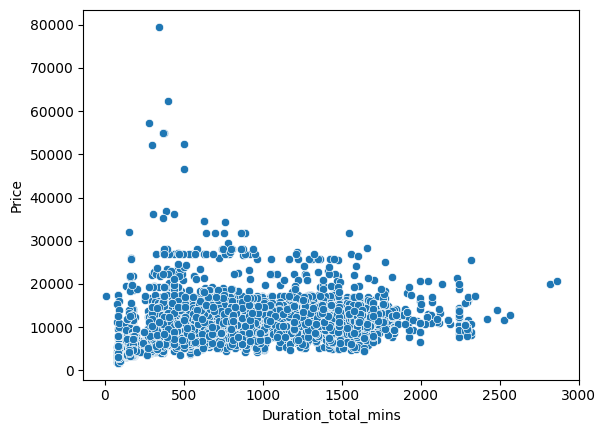

In [79]:
sns.scatterplot(x="Duration_total_mins", y="Price", data= data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

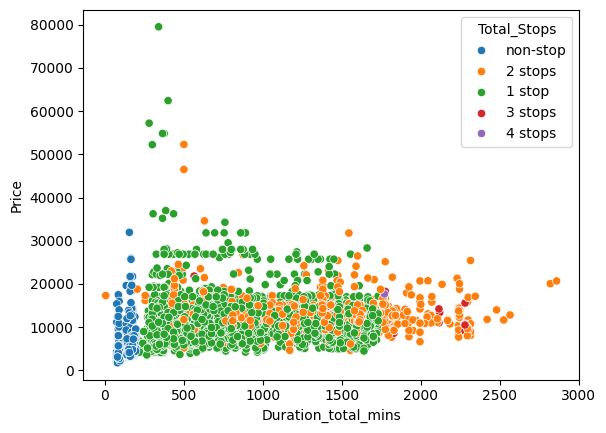

In [80]:
# Hue parameter ne do this
sns.scatterplot(x="Duration_total_mins", y="Price",hue="Total_Stops", data = data) # here stops are in diff colors
# durration is increase then price also increase

In [81]:
# Data Analysis session
# 1 on which route jet airways is extremely used
# 2 Airline vs price Analysis

In [82]:
# data = jet airwars
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [83]:
data[data['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,9,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,18,55,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,8,0,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,8,55,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,21,10,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,11,40,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,23,5,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,13,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,20,35,24,45,1485


In [84]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [85]:
# Airline -> min price, 25th percentlie, median, mean, 75th, max Box plot draw now

In [86]:
# matplotlib = 1 % to 99 % low to highest
# Box plot need for cost and for see outliers
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

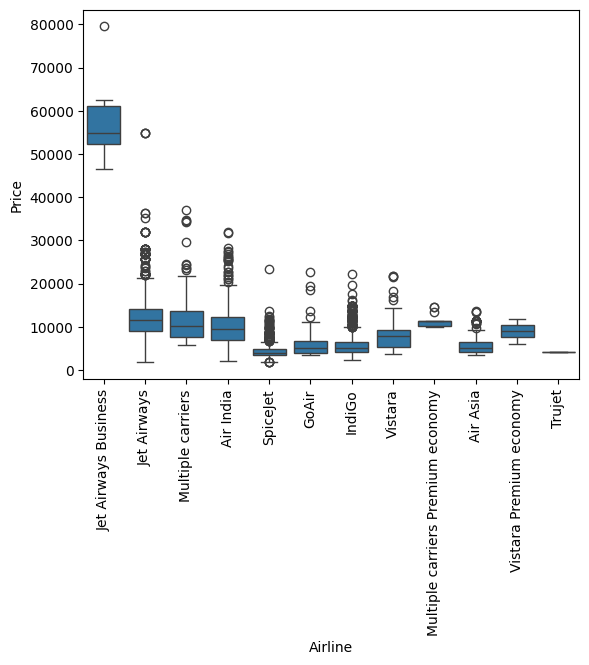

In [87]:
sns.boxplot(y="Price", x="Airline", data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical") # for removing overlapping
plt.show()

In [88]:
# One hot encoding
# feature Engineering
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [89]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [90]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [91]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [92]:
# one hot apply
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [93]:
# feature encoding and enginerring
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x== sub_category else 0) 

In [94]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [95]:
# Feature encoding
# covert Airline and desination in numerical format
data['Airline'].unique().size

12

In [96]:
# Target guidend encoding on data and perform manual encoding on data 
# Highest avg value hightest inportance we give
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [97]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [98]:
airlines # use enumeration for give number iterate on enum

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [99]:
dict_airlines = {key: index for index, key in enumerate(airlines, 0)}

In [100]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [101]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [102]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [103]:
data.head() # now airline is converted in number 

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,16,50,4,45,285,1,0,0,0,0


In [104]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [105]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [106]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [107]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [108]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [109]:
dict_dest = {key: index for index, key in enumerate(dest, 0)}

In [110]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [111]:
data['Destination'] = data['Destination'].map(dict_dest)

In [112]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [113]:
data.head(3)  # now destination is also on numerical

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [114]:
# Perform Manual Encoding on data
# Remove unnessary feature
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [115]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [116]:
data['Total_Stops'].unique() # Label Encoding 

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [117]:
# Label Enxoding without using sklearn
# use dict concept 
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


In [118]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [119]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [120]:
# Remove unnessary columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [121]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [122]:
data['Additional_Info'].value_counts()/len(data)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [123]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [124]:
data.drop(['Date_of_Journey', 'Additional_Info','Duration', 'Source'], axis = 1, inplace=True)

In [125]:
data.head(2)

,Airline,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,0,3897,24,3,2019,22,20,22,20,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,2,7662,1,5,2019,5,50,5,50,7,25,445,0,1,0,0,0


In [126]:
data['Journey_year'].unique()

array([2019])

In [127]:
data.drop(['Journey_year','Route'],axis = 1, inplace= True)

In [128]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,22,20,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,5,50,7,25,445,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,9,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,18,5,5,25,325,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,16,50,4,45,285,1,0,0,0,0


In [129]:
# Outlier it is very low or high value data
# How to deal with outlier
def plot(data, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(data[col], ax = ax1)
    sns.boxplot(data[col],  ax = ax2) 
    sns.distplot(data[col], ax=ax3, kde = False)

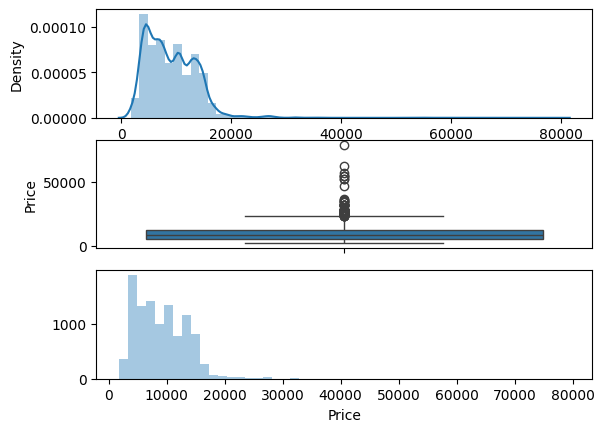

In [130]:
plot(data, 'Price')

In [131]:
#outlier
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3- q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [132]:
print(maximum)

23017.0


In [133]:
print(minimum)

-5367.0


In [134]:
# This is all outlier
[price for price in data['Price'] if price> maximum or  price< minimum]

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26743,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 26890,
 25735,
 54826,
 26890,
 35185,
 79512,
 28097,
 27992,
 26890,
 25735,
 26092,
 31825,
 25913,
 25735,
 27992,
 31825,
 23267,
 62427,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 31825,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 27992,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 26890,
 23528,
 31825,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 57209,
 26890,
 31825,
 26480]

In [135]:
len([price for price in data['Price'] if price> maximum or  price< minimum])

94

In [136]:
data['Price']  = np.where(data['Price'] >= 35000 , data['Price'].median(), data['Price'])

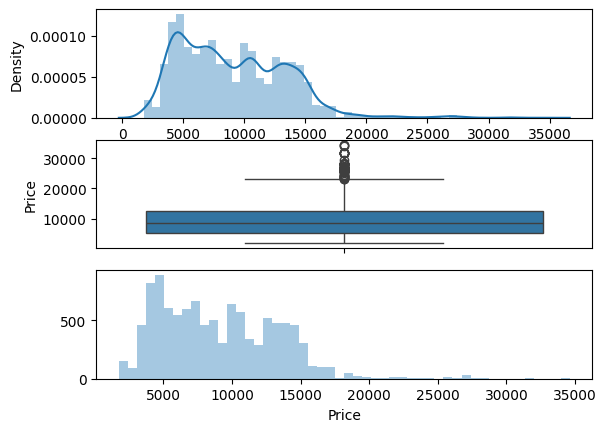

In [137]:
plot(data, 'Price')

In [138]:
# Feature Selection
# 1 independent feature = Route, Dest, Source, Airline => Best Feature
# 2 dependend feature =
# Mutual information approch 2 feature (Random variable) they are completely independed it is highter dependency


In [188]:
x = data.drop(['Price'], axis = 1)

In [190]:
x.head(2)

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,22,20,2,50,170,1,0,0,0,0
1,7,3,2,1,5,5,50,5,50,7,25,445,0,1,0,0,0


In [140]:
y = data['Price']

In [141]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [142]:
from sklearn.feature_selection import mutual_info_regression


In [143]:
imp = mutual_info_regression(x,y)

In [144]:
imp

array([1.30840859, 1.06816909, 0.79700565, 0.36860629, 0.63071277,
       0.93665407, 0.76254049, 0.92815598, 0.76903192, 1.12060335,
       0.67785549, 1.77556894, 0.39241507, 0.45161599, 0.51181622,
       0.13262411, 0.2031348 ])

In [145]:
imp_df = pd.DataFrame(imp, index = x.columns)

In [146]:
imp_df.columns = ['importance']

In [147]:
imp_df

,importance
Airline,1.308409
Destination,1.068169
Total_Stops,0.797006
Journey_day,0.368606
Journey_month,0.630713
Dep_Time_hour,0.936654
Dep_Time_min,0.762540
Arrival_Time_hour,0.928156
Arrival_Time_min,0.769032
Duration_hours,1.120603


In [148]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Duration_total_mins,1.775569
Airline,1.308409
Duration_hours,1.120603
Destination,1.068169
Dep_Time_hour,0.936654
Arrival_Time_hour,0.928156
Total_Stops,0.797006
Arrival_Time_min,0.769032
Dep_Time_min,0.762540
Duration_mins,0.677855


In [149]:
# Model Building area
# How to build a model Traning and testing data
# Traning data means from which some kind of prediction id done
# Testing how well machine model is performing


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=1234)

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
ml_model = RandomForestRegressor()

In [154]:
ml_model.fit(x_train, y_train)

RandomForestRegressor()

In [192]:
y_predict = ml_model.predict(x_test)

In [193]:
y_predict

array([ 3888.5       , 13380.29233333, 13930.22092857, ...,
       11952.79      , 13194.34783333, 15726.88      ])

In [194]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,22,20,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,5,50,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,9,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,18,5,5,25,325,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,16,50,4,45,285,1,0,0,0,0


In [207]:
ml_model.predict()

TypeError: ForestRegressor.predict() missing 1 required positional argument: 'X'

In [204]:
x_test

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6220,1,3,0,21,6,9,0,9,0,2,25,145,0,1,0,0,0
3995,8,4,1,12,6,14,0,14,0,11,30,690,0,0,1,0,0
2191,10,4,2,27,6,18,20,18,20,18,15,1095,0,0,1,0,0
9214,8,4,1,6,3,6,40,6,40,12,10,730,0,0,1,0,0
5060,7,1,0,6,6,19,30,19,30,1,15,75,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,10,4,0,15,6,11,0,11,0,3,15,195,0,0,1,0,0
1532,3,2,0,3,3,23,30,23,30,2,50,170,1,0,0,0,0
2258,10,2,1,18,3,8,0,8,0,7,15,435,1,0,0,0,0
1195,10,3,1,6,6,21,10,21,10,12,10,730,0,1,0,0,0


In [157]:
from sklearn import metrics

In [158]:
metrics.r2_score(y_test, y_predict)

0.810699152261907

In [159]:
# Save the model


In [160]:
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [161]:
import pickle

In [162]:
file = open(r'E:\1st All B.tech notes\Placement interview\CDAC Projects ss\Project\1st/rf_random.pkl', 'wb')

In [163]:
pickle.dump(ml_model, file)

In [164]:
model = open(r'E:\1st All B.tech notes\Placement interview\CDAC Projects ss\Project\1st/rf_random.pkl', 'rb')

In [165]:
forest = pickle.load(model)

In [166]:
y_pred2 = forest.predict(x_test)

In [167]:
metrics.r2_score(y_test, y_pred2)  # same score 

0.810699152261907

In [168]:
# Own Evaluation metrics
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # MAE = actual - predict
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [169]:
mape(y_test, y_predict)

13.463549844270817

In [170]:
from sklearn import metrics

In [171]:
# Define machine learning model pipeline
def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    print("Training score: {}".format(model.score(x_train, y_train)))
    y_predection = model.predict(x_test)
    print("prediction are : {}".format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('mape: {}'.format(mape(y_test, y_predection)))
    sns.distplot(y_test - y_predection)

Training score: 0.9550401572584942
prediction are : [ 3903.58       13312.99       13730.63583333 ... 11904.55
 13261.35833333 15651.215     ]


r2 score : 0.8119062422938381
MAE : 1208.7690359503645
MSE : 3663393.047695385
RMSE: 1913.9992287603945
mape: 13.403475453283336


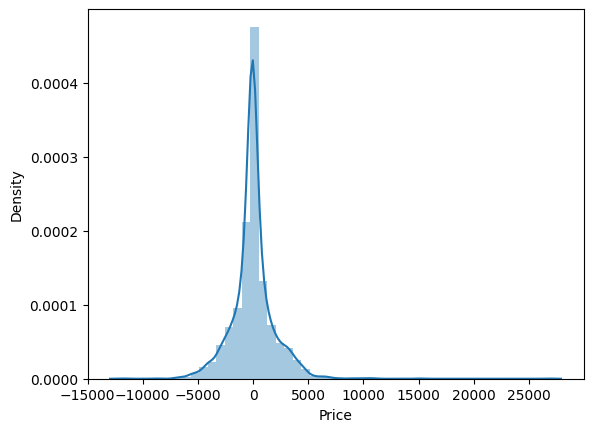

In [172]:
predict(RandomForestRegressor())

In [173]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.9721438903796757
prediction are : [ 3873.         13377.         13102.66666667 ... 12284.
 14571.         15129.        ]


r2 score : 0.7092262779635121
MAE : 1401.8864950598024
MSE : 5663231.171260097
RMSE: 2379.7544350752028
mape: 15.437925153167404


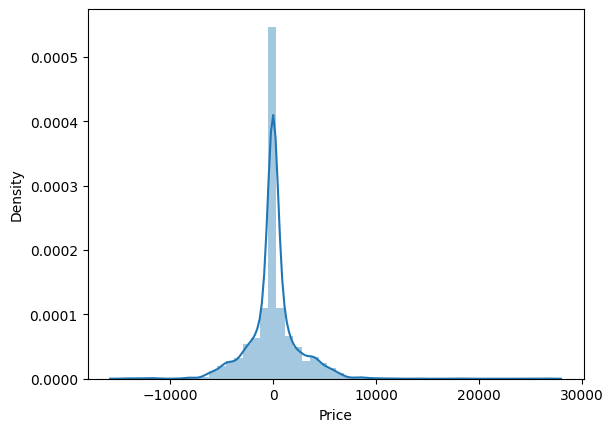

In [174]:
predict(DecisionTreeRegressor())

In [175]:
# Hypertune machine learning model

In [176]:
from sklearn.model_selection import RandomizedSearchCV

In [177]:
reg_rf = RandomForestRegressor()

In [178]:
np.linspace(start = 100, stop = 1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [179]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=120, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start= 5, stop=10, num=4)]
min_samples_split = [5,10,15,100]

In [180]:
random_grid = {
    'n_estimators': n_estimators,
     'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [181]:
random_grid

{'n_estimators': [100, 104, 108, 112, 116, 120],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 8, 10],
 'min_samples_split': [5, 10, 15, 100]}

In [182]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions = random_grid
                  , cv=3, n_jobs = 1,verbose = 2)

In [183]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=104; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=104; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=104; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_split=10, n_estimators=104; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_split=10, n_estimators=104; total time=   0.7s
[CV] END max_depth=8, max_features=sqrt, min_samples_split=10, n_estimators=104; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_featur

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 104, 108, 112,
                                                         116, 120]},
                   verbose=2)

In [184]:
rf_random.best_params_

{'n_estimators': 104,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 8}

In [185]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=10,
                      n_estimators=104)

In [186]:
rf_random.best_score_  # it give a best result in accuracy

0.7374177886390805